# 3) Product categories

Products are uniquely identified through the `StockCode` variable. A short description of the products is given in the `Description` variable.

In this section, we use the content of the variable `Description` to group the products into different categories.

We extract keywords from `Description` with the function below.

In [2]:
import pandas as pd

from google.colab import drive
drive.mount('/content/drive')
relative_path = '/content/drive/My Drive/'

df_dropna = pd.read_csv(relative_path + 'data_dropna.csv', encoding='latin', dtype={'CustomerID': str}) 
df_cleaned = pd.read_csv(relative_path + 'data_cleaned.csv', encoding='latin', dtype={'CustomerID': str}) 

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (2) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
print(df_dropna.shape, df_cleaned.shape)

(406829, 9) (398057, 12)


In [4]:
df_dropna.head()

,Unnamed: 0,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom
1,1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
2,2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom
3,3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
4,4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom


In [5]:
df_cleaned.head()

,Unnamed: 0,Unnamed: 0.1,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,QuantityCanceled,TotalPrice
0,0,0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,0,15.30
1,1,1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,0,20.34
2,2,2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,0,22.00
3,3,3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,0,20.34
4,4,4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,0,20.34


In [6]:
import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [7]:
from nltk import word_tokenize 	
text = word_tokenize("And now look for something completely different")
nltk.pos_tag(text)

[('And', 'CC'),
 ('now', 'RB'),
 ('look', 'VBP'),
 ('for', 'IN'),
 ('something', 'NN'),
 ('completely', 'RB'),
 ('different', 'JJ')]

Here we see that and is CC, a coordinating conjunction; now and completely are RB, or adverbs; for is IN, a preposition; something is NN, a noun; and different is JJ, an adjective. VBP is verb

In [8]:
#Some operation with Add fuction
a=dict()
a['a']={'hello'}
a['a'].add('world')
a

{'a': {'hello', 'world'}}

In [9]:

# The function to extract keywords from (unique) Descriptions


is_noun = lambda pos: pos[:2] == 'NN'

def keywords_inventory(dataframe, column = 'Description'):
#The algorithms have been developed by Martin Porter
#These stemmers are called Snowball, because Porter created
#    a programming language with this name for creating
#    new stemming algorithms. There is more information available
#    at http://snowball.tartarus.org/
    stemmer = nltk.stem.SnowballStemmer("english")
    keywords_roots  = dict()  # collect the words / root
    keywords_select = dict()  # association: root <-> keyword
    category_keys   = []
    count_keywords  = dict()
    icount = 0
    for s in dataframe[column]:
        if pd.isnull(s): continue
        lines = s.lower()
        tokenized = nltk.word_tokenize(lines)
        nouns = [word for (word, pos) in nltk.pos_tag(tokenized) if is_noun(pos)] 
        
        for t in nouns:
            t = t.lower() ; root = stemmer.stem(t)
            if root in keywords_roots:                
                keywords_roots[root].add(t)
                count_keywords[root] += 1                
            else:
                keywords_roots[root] = {t}
                count_keywords[root] = 1
    
    for s in keywords_roots.keys():
        if len(keywords_roots[s]) > 1:  
            min_length = 1000
            for k in keywords_roots[s]:
                if len(k) < min_length:
                    key = k ; min_length = len(k)            
            category_keys.append(key)
            keywords_select[s] = key
        else:
            category_keys.append(list(keywords_roots[s])[0])
            keywords_select[s] = list(keywords_roots[s])[0]
                   
    print("Nb of keywords in variable '{}': {}".format(column,len(category_keys)))
    return category_keys, keywords_roots, keywords_select, count_keywords

In [10]:
print(keywords_inventory)

<function keywords_inventory at 0x7f37f81b9ae8>


This function takes the dataframe and analyzes the content of the `Description` column by performing the following operations:

* extract the names (proper, common) appearing in the products description
* for each name, extract the root of the word and aggregate the set of names associated with this particular root
* count the number of times each root appears in the dataframe
* when several words are listed for the same root, we consider that the keyword associated with this root is the shortest one (this systematically selects the singular when there are singular/plural variants)

## 3.1) Unique descriptions
**Task**: extract unique descriptions. How many of them do we have?
Use keywords_inventory function.

In [11]:
df_products = pd.DataFrame(df_dropna['Description'].unique()).rename(columns={0:'Description'})
keywords, keywords_roots, keywords_select, count_keywords =  keywords_inventory(df_products)

Nb of keywords in variable 'Description': 1483


In [12]:
# Fanbo solution
df_produits = pd.DataFrame(df_dropna['Description'].unique()).rename(columns = {0:'Description'})
print("number of different descriptions is:", len(df_produits))
# use the function
keywords, keywords_roots, keywords_select, count_keywords = keywords_inventory(df_produits)
print(keywords,'\n', keywords_roots,'\n',  keywords_select,'\n',  count_keywords)

number of different descriptions is: 3896
Nb of keywords in variable 'Description': 1483
['heart', 'holder', 'metal', 'lantern', 'cream', 'cupid', 'coat', 'hanger', 'union', 'flag', 'water', 'bottle', 'nest', 'box', 'glass', 'star', 'hand', 'jack', 'warmer', 'dot', 'bird', 'ornament', 'poppy', 'playhouse', 'bedroom', 'kitchen', 'feltcraft', 'princess', 'charlotte', 'doll', 'ivory', 'cosy', 'colour', 'teaspoons', 'vintage', 'jigsaw', 'block', 'alphabet', 'home', 'building', 'word', 'love', 'recipe', 'england', 'jam', 'jar', 'rack', 'paris', 'fashion', 'bath', 'alarm', 'clock', 'bakelike', 'pink', 'green', 'panda', 'bunny', 'sheet', 'tape', 'globe', 'head', 'tail', 'game', 'set/2', 'retrospot', 'tea', 'towel', 'round', 'snack', 'woodland', 'spaceboy', 'lunch', 'i', 'london', 'circus', 'bag', 'design', 'toadstool', 'night', 'light', 'seaside', 'puzzles', 'mini', 'parade', 'paint', 'postage', 'paper', 'chain', 'christmas', 'parasol', 'coffee', 'mug', 'planet', 'billboard', 'love/hate', 'wo

Investigate what the variables `keywords`, `keywords_roots` and `count_keywords` represent.

**..............Put your answer here..............**

## 3.2) Dictionary to list
**Task**: convert the count_keywords dictionary into a list, to sort the keywords according to their occurences, show the 5 most common

In [13]:
# Fanbo solution
keywords=pd.Series(count_keywords)
keywords.sort_values(ascending=False).head(5)

heart     267
vintag    211
set       206
pink      189
bag       165
dtype: int64

## 3.3) Plot the words
**Task**: plot words with the number of occurences for each word (in the unique descriptions!)

In [14]:
keywords.head()

heart      267
holder     120
metal       99
lantern      8
cream       49
dtype: int64

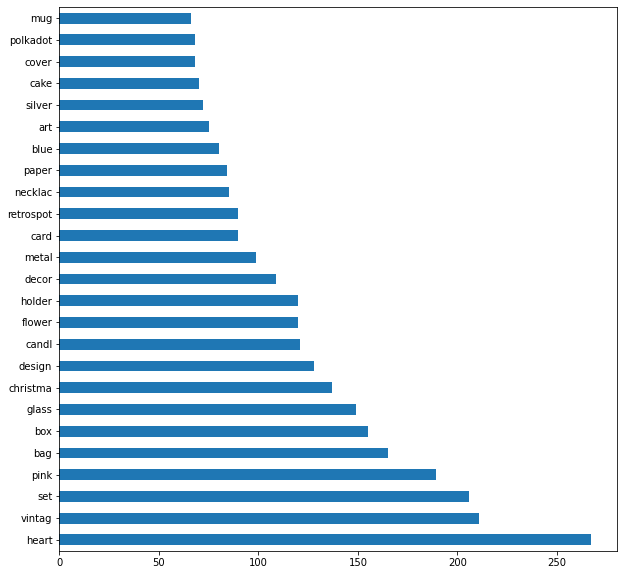

In [15]:
import matplotlib.pyplot as plt
#plot 25 most common words here
keywords_sort=keywords.sort_values(ascending=False)
plt.figure(figsize=(10,10))
keywords_sort[:25].plot.barh()

## 3.4) Remove irrelevant words
There are about 1480 keywords, but some of them are useless like the different colors ('black', 'red', ...). That's why we discard keywords which are too short (less than 3 charaters), colors, those that occur less than 1300 times, or contain '+', '/'. Make sure that you have 193 words left after this step.

In [16]:
list_products = newlist3=[]
for j, k in count_keywords.items():
  if len(j)<3 or j in ['pink', 'green', 'blue', 'orange', 'tag'] or '+' in j or '/' in j or k<13: continue
  newlist3.append(j)
len(list_products)

193

## 3.5) Encoding of words
**Task**: define a matrix `X` with 193 columns - 193 key words above as categories rows correspond to items of unique_products (unique descriptions of the cleaned data): 
For each unique description (you should have 3878 of them) and for each 193 of key words you need to get 0 or 1 (boolean for "is this word in this description or not").


In [17]:
#Define X
unique_products = df_cleaned['Description'].unique()
X = pd.DataFrame()
for key in newlist3:
    X.loc[:, key] = list(map(lambda x:int(key.upper() in x), unique_products))
print(X.shape)
X.head()

(3878, 193)


,heart,holder,metal,cream,hanger,union,water,bottl,box,glass,star,hand,jack,warmer,bird,kitchen,feltcraft,ivori,colour,vintag,jigsaw,alphabet,home,jam,jar,rack,clock,bunni,tape,retrospot,tea,towel,round,woodland,spaceboy,lunch,london,bag,design,toadstool,...,craft,tree,wreath,gingham,lace,biscuit,gift,medium,bracelet,hair,diamant,ring,stripe,flock,regenc,antiqu,easter,child,dish,shape,pan,pantri,door,food,imag,retro,book,number,hen,chick,drop,earring,leaf,shell,bead,jewel,orbit,doiley,wallet,point
0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [18]:
# Fanbo solution
record=[]
for lines in unique_products:
  tmp=[]
  for words in newlist3:
    if words.upper() in lines:
      tmp.append(1)
    else:
      tmp.append(0)
  record.append(tmp)
X=pd.DataFrame(record, columns=list(newlist3))
X.head()

,heart,holder,metal,cream,hanger,union,water,bottl,box,glass,star,hand,jack,warmer,bird,kitchen,feltcraft,ivori,colour,vintag,jigsaw,alphabet,home,jam,jar,rack,clock,bunni,tape,retrospot,tea,towel,round,woodland,spaceboy,lunch,london,bag,design,toadstool,...,craft,tree,wreath,gingham,lace,biscuit,gift,medium,bracelet,hair,diamant,ring,stripe,flock,regenc,antiqu,easter,child,dish,shape,pan,pantri,door,food,imag,retro,book,number,hen,chick,drop,earring,leaf,shell,bead,jewel,orbit,doiley,wallet,point
0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


## 3.6) Range of UnitPrice feature
We want to add new feature: how expensive is one unit of our stock. We want to make several features: price in regions: $[0,1], [1,2], [2,3], [3,5], [5,10], [10,\infty)$

***Note***: it can spend some time, try on small ammount of data first.
You matrix `X` should have 199 features now, check it.


In [19]:
# add price ranges
threshold = [0, 1, 2, 3, 5, 10]
label_col = []
for i in range(len(threshold)):
    if i == len(threshold)-1:
        col = '.>{}'.format(threshold[i])
    else:
        col = '{}<.<{}'.format(threshold[i],threshold[i+1])
    label_col.append(col)
    X.loc[:, col] = 0

X.head()

,heart,holder,metal,cream,hanger,union,water,bottl,box,glass,star,hand,jack,warmer,bird,kitchen,feltcraft,ivori,colour,vintag,jigsaw,alphabet,home,jam,jar,rack,clock,bunni,tape,retrospot,tea,towel,round,woodland,spaceboy,lunch,london,bag,design,toadstool,...,gift,medium,bracelet,hair,diamant,ring,stripe,flock,regenc,antiqu,easter,child,dish,shape,pan,pantri,door,food,imag,retro,book,number,hen,chick,drop,earring,leaf,shell,bead,jewel,orbit,doiley,wallet,point,0<.<1,1<.<2,2<.<3,3<.<5,5<.<10,.>10
0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [20]:
# Alternatively
for i, prod in enumerate(unique_products):
    price = df_cleaned[ df_cleaned['Description'] == prod]['UnitPrice'].mean()
    j = 0
    while price > threshold[j]:
        j+=1
        if j == len(threshold): break
    X.loc[i, label_col[j-1]] = 1

X.head()

,heart,holder,metal,cream,hanger,union,water,bottl,box,glass,star,hand,jack,warmer,bird,kitchen,feltcraft,ivori,colour,vintag,jigsaw,alphabet,home,jam,jar,rack,clock,bunni,tape,retrospot,tea,towel,round,woodland,spaceboy,lunch,london,bag,design,toadstool,...,gift,medium,bracelet,hair,diamant,ring,stripe,flock,regenc,antiqu,easter,child,dish,shape,pan,pantri,door,food,imag,retro,book,number,hen,chick,drop,earring,leaf,shell,bead,jewel,orbit,doiley,wallet,point,0<.<1,1<.<2,2<.<3,3<.<5,5<.<10,.>10
0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


## 3.7) Number of products for each price range
**Task:** Show the number of products per price range.

In [21]:
print("{:<8} {:<20} \n".format('range', 'number of products') + 20*'-')
print((X.iloc[:,-6:]).sum(axis=0))

range    number of products   
--------------------
0<.<1      964
1<.<2     1009
2<.<3      673
3<.<5      608
5<.<10     468
.>10       156
dtype: int64


##3.8) Creating clusters of products

In this section, we group the products into different classes. 

In the case of matrices with binary encoding, the most suitable metric for the calculation of distances is the Hamming distance. 
<br>https://en.wikipedia.org/wiki/Hamming_distance

Here we simply use Euclidean distance with kmeans. To choose approximately the number of clusters that best describes the data, we use the silhouette score:<br>
https://en.wikipedia.org/wiki/Silhouette_(clustering)

For n_clusters = 3 The average silhouette_score is : 0.10397110520516398
For n_clusters = 4 The average silhouette_score is : 0.12981799436260522
For n_clusters = 5 The average silhouette_score is : 0.15096969410471892
For n_clusters = 6 The average silhouette_score is : 0.1488021371049524
For n_clusters = 7 The average silhouette_score is : 0.1534120102950807
For n_clusters = 8 The average silhouette_score is : 0.15416335629604325
For n_clusters = 9 The average silhouette_score is : 0.15307799626725646
For n_clusters = 10 The average silhouette_score is : 0.15793996538981478
For n_clusters = 11 The average silhouette_score is : 0.14736331182188206
For n_clusters = 12 The average silhouette_score is : 0.14768886454427002
For n_clusters = 13 The average silhouette_score is : 0.1357510934211054
For n_clusters = 14 The average silhouette_score is : 0.1361063019016494


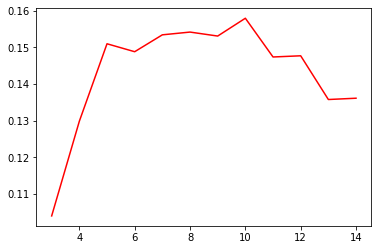

In [22]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import numpy as np

matrix = X.values
Silhouettes = []
N=[]
for n_clusters in range(3,15):
    N.append(n_clusters)
    kmeans = KMeans(init='k-means++', n_clusters = n_clusters, n_init=1000)
    kmeans.fit(matrix)
    clusters = kmeans.predict(matrix)
    silhouette_avg = silhouette_score(matrix, clusters)
    Silhouettes.append(silhouette_avg)

    print("For n_clusters =", n_clusters, "The average silhouette_score is :", silhouette_avg)

plt.plot(N, Silhouettes, c='r')

The more absolute value of score, the better. However, we also want to avoid very small clusters. How many clusters we need to choose in our case?

5

## 3.9) Adjust the model
As you remember, K-means can converge to a local minimum, and sometimes it is usefull to run it several times to get a better silhouette score. Choose a treshold equal to 0.145 (or more) and repeat the K-means clustering until you get a better silhouette score than this threshold. Investigate the number of elements in each cluster.

In [23]:
# run Kmeans in loop until you get good result
silhouette_avg = -1
n_clusters = 5
while silhouette_avg < 0.147:
    kmeans = KMeans(init='k-means++', n_clusters = n_clusters, n_init=30)
    kmeans.fit(matrix)
    clusters = kmeans.predict(matrix)
    silhouette_avg = silhouette_score(matrix, clusters)
    print("For n_clusters =", n_clusters, "The average silhouette_score is :", silhouette_avg)

pd.Series(clusters).value_counts()

For n_clusters = 5 The average silhouette_score is : 0.12977731627830205
For n_clusters = 5 The average silhouette_score is : 0.14873580833765637


4    1118
2    1009
3     673
0     608
1     470
dtype: int64

## 3.10) Plot 
Plot the [silhouette](https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html) scores:

In [24]:
def graph_component_silhouette(n_clusters, lim_x, mat_size, sample_silhouette_values, clusters):
    plt.rcParams["patch.force_edgecolor"] = True
    plt.style.use('fivethirtyeight')
    mpl.rc('patch', edgecolor = 'dimgray', linewidth=1)
    #
    fig, ax1 = plt.subplots(1, 1)
    fig.set_size_inches(8, 8)
    ax1.set_xlim([lim_x[0], lim_x[1]])
    ax1.set_ylim([0, mat_size + (n_clusters + 1) * 10])
    y_lower = 10
    for i in range(n_clusters):
        
        # Aggregate the silhouette scores for samples belonging to cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[clusters == i]
        ith_cluster_silhouette_values.sort()
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i
        cmap = cm.get_cmap("Spectral")
        color = cmap(float(i) / n_clusters)        
        ax1.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values,
                           facecolor=color, edgecolor=color, alpha=0.8)
        
        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.03, y_lower + 0.5 * size_cluster_i, str(i), color = 'red', fontweight = 'bold',
                bbox=dict(facecolor='white', edgecolor='black', boxstyle='round, pad=0.3'))
        
        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  

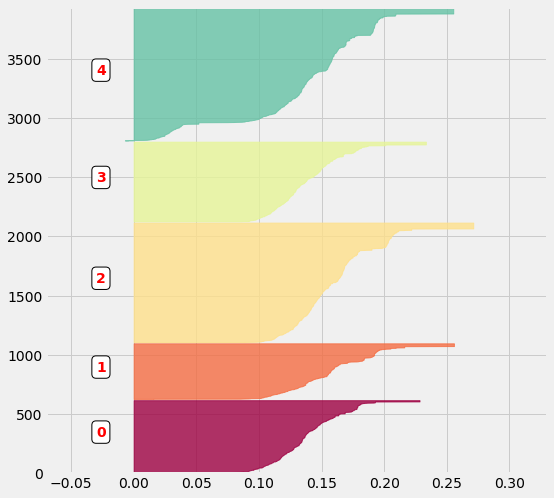

In [25]:
from sklearn.metrics import silhouette_samples
import matplotlib as mpl
import matplotlib.cm as cm
import numpy as np

# define individual silouhette scores
sample_silhouette_values = silhouette_samples(matrix, clusters)

# and the graph
graph_component_silhouette(n_clusters, [-0.07, 0.33], len(X), sample_silhouette_values, clusters)

## 3.11) Save data
Save variables `Matrix_X.csv` and `clusters` to your google drive

In [26]:
X.to_csv('/content/drive/My Drive/Matrix_X.csv')
(pd.Series(clusters)).to_csv('/content/drive/My Drive/Matrix_X_clusters.csv', header = 'False')